# TP 01 : Régression linéaire et logistique binaire

Binômes : 
- Binôme 1
- Binôme 2

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

## I. Réalisation des algorithmes

Cette partie sert à améliorer la compréhension les algorithmes d'apprentissage automatique vus en cours en les implémentant à partir de zéro. 
Pour ce faire, on va utiliser la bibliothèque **numpy** qui est utile dans les calcules surtout matricielles.

### I.1. Regression linéaire 

Premièrement, on va implémenter les fonctions nécéssaires pour la régression linéaire.

#### I.1.1. Fonction de prédiction

$$Z = zf(X, theta) = \theta_0 + \sum\limits_{j=1}^{N} \theta_j X_j = \sum\limits_{j=0}^{N} \theta_j X_j | X_0 = 1 $$

- X : une matrice de M lignes (échantillons) et (N + 1) colonnes (caractéristiques). Avant d'utiliser cette fonction, on doit augmenter la matrice originale avec une colonne pour $X_0 = 1$ si on veut utiliser $\theta_0$
- $\theta$ : un vecteur des paramétres avec une taille (N + 1)
- Z : un vecteur de taille M

In [3]:
# TODO: Calculer la combinaison linéaire
def zf(X, theta):
    return np.sum(X*theta,axis=1)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([1. , 1.7, 2.4])
#---------------------------------------------------------------------
X_t = np.array([[1., 100.], [1., 200.], [1., 300.]])
Theta_t = np.array([0.3, 0.007])
zf(X_t, Theta_t)

array([1. , 1.7, 2.4])

#### I.1.2. Fonction du coût

La fonction du coût calcule l'erreur entre les valeurs estimées ($H$) en utilisant la fonction de prédiction $z$ précédente (H = Z(X, theta) et les valeurs réelles ($Y$).
Ici, on va utiliser l'erreur quadratique moyenne (MSE: mean square error). 

$$J = MSE(Y, H) = \frac{1}{2M} \sum\limits_{i=1}^{M} (Y - H)^2$$


In [6]:
# TODO: Définir la fonction du coût MSE
def MSE(Y, H):
    return np.sum((Y-H)**2)/(2*Y.shape[0])

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 0.016666666666666673
#---------------------------------------------------------------------
H_t = np.array([1. , 1.7, 2.4])
Y_t = np.array([1., 2., 2.5])
MSE(Y_t, H_t)

0.016666666666666673

Le gradient de cette fonction est calculé comme suit : 

$$\frac{\partial MSE}{\partial \theta_j} 
= \frac{\partial }{\partial \theta_j} \frac{1}{2M} \sum\limits_{i=1}^{M} (Y^{(i)} - H^{(i)})^2 
= \frac{1}{2M} \sum\limits_{i=1}^{M} [\frac{\partial }{\partial \theta_j} (Y^{(i)} - H^{(i)})^2]
= \frac{1}{2M} \sum\limits_{i=1}^{M} [-2 (Y^{(i)} - H^{(i)}) \frac{\partial }{\partial \theta_j} H^{(i)}]
$$

$$\frac{\partial MSE}{\partial \theta_j}
= \frac{1}{M} \sum\limits_{i=1}^{M} [(H^{(i)} - Y^{(i)}) \frac{\partial }{\partial \theta_j} \sum\limits_{k=0}^{N} \theta_k X_k^{(i)}]
= \frac{1}{M} \sum\limits_{i=1}^{M} [(H^{(i)} - Y^{(i)}) \frac{\partial }{\partial \theta_j} \theta_j X_j^{(i)}]
$$

$$\frac{\partial MSE}{\partial \theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (H^{(i)} - Y^{(i)}) X_j^{(i)}$$

- 
Où $X^{(i)}$ est l'échantillon $i$ et $Y^{(i)}$ est la prédiction. $X_0^{(i)} = 1$

In [8]:
# TODO: Définir la fonction de gradient MSE
# Elle doit retourner les gradients de tous les thétas
def dMSE(X, Y, H):
    return (H-Y)@X/Y.shape[0]

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([ -0.13333333, -30.        ])
#---------------------------------------------------------------------
X_t = np.array([[1., 100.], [1., 200.], [1., 300.]])
H_t = np.array([1. , 1.7, 2.4])
Y_t = np.array([1., 2., 2.5])
dMSE(X_t, Y_t, H_t)

array([ -0.13333333, -30.        ])

### I.2. Régression logistique

Ici, on va implémenter la régression logistique qui se base sur la combinaison linéaire de la régression linaire.

#### I.2.1. Fonction de prédiction

$$P(X, theta) = Sg(zf(X, theta)) $$

$$Sg(Z) = \frac{1}{1+e^{-Z}}$$

- X : une matrice de M lignes (échantillons) et (N + 1) colonnes (caractéristiques). Avant d'utiliser cette fonction, on doit augmenter la matrice originale avec une colonne pour $X_0 = 1$ si on veut utiliser $\theta_0$
- $\theta$ : un vecteur des paramétres avec une taille (N + 1)
- Z : un vecteur 

In [9]:
# TODO La fonction ségmoid
# Elle doit fonctionner sur des scalaires ou des vecteurs de numpy
def sg(Z): 
    return 1/(1+np.exp(-Z))

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : (0.5, array([0.26894142, 0.73105858]))
#---------------------------------------------------------------------
sg(0), sg(np.array([-1, 1]))

(0.5, array([0.26894142, 0.73105858]))

In [12]:
# TODO Prédiction de probabilité dans la régression logistique
# Probabilité de la régression logistique
def Prl(X, Theta): 
    return sg(zf(X, Theta))

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([0.5621765 , 0.99477987, 0.02297737])
#---------------------------------------------------------------------
X_t = np.array([[1., 0], [1., 10.], [1., -8]])
Theta_t = np.array([0.25, 0.5])

Prl(X_t, Theta_t)

array([0.5621765 , 0.99477987, 0.02297737])

#### I.2.2. Fonction du coût

La fonction du coût calcule l'erreur entre les valeurs estimées ($H$).
Ici, on va utiliser l'entropie croisée binaire (BCE: Binary Cross Entropy Loss). 

$$BCE(Y^{(i)}, H^{(i)})
= \begin{cases}
- \log(H^{(i)}) & \text{ si } Y^{(i)} = 1\\ 
- \log(1 - H^{(i)})  & \text{ si } Y^{(i)} = 0
\end{cases}
$$
Puisque $Y^{(i)} \in \{0, 1\}$, donc : 

$$ BCE(Y^{(i)}, H^{(i)}) = - Y^{(i)} \log(H^{(i)}) - (1- Y^{(i)}) \log(1 - H^{(i)}) $$

$$J = BCE(Y, H) = \frac{-1}{M} \sum\limits_{i=1}^{M} [Y^{(i)} \log(H^{(i)}) + (1- Y^{(i)}) \log(1 - H^{(i)})]$$

In [15]:
# TODO : La fonction de cout BCE 
def BCE(Y, H): 
    return np.sum(-Y*np.log(H)-(1-Y)*np.log(1-H))/(Y.shape[0])

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 0.6181210324473608
#---------------------------------------------------------------------
Y_t = np.array([1., 0., 0., 1.])
H_t = np.array([0.25, 0.25, 0.5, 0.9])
BCE(Y_t, H_t)

0.6181210324473608

Le gradient de cette fonction est calculé comme suit : 

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{\partial}{\partial \theta_j} [Y^{(i)} \log(H^{(i)}) + (1- Y^{(i)}) \log(1 - H^{(i)})]
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} [ Y^{(i)} \frac{\partial}{\partial \theta_j} \log(H^{(i)}) + (1- Y^{(i)}) \frac{\partial}{\partial \theta_j}\log(1 - H^{(i)})]
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} [ Y^{(i)} \frac{1}{H^{(i)}} \frac{\partial}{\partial \theta_j} H^{(i)} + (1- Y^{(i)}) \frac{-1}{1-H^{(i)}} \frac{\partial}{\partial \theta_j} H^{(i)})]
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{Y^{(i)}-H^{(i)}}{H^{(i)}(1-H^{(i)})} \frac{\partial}{\partial \theta_j} H^{(i)}
$$

$$\frac{\partial H^{(i)}}{\partial \theta_j} 
= \frac{\partial \sigma(Z^{(i)})}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial \theta_j} 
= [\sigma(Z^{(i)}) (1-\sigma(Z^{(i)}))]\frac{\partial}{\partial \theta_j} \sum\limits_{k=0}^{N} \theta_k X_k^{(i)}  
= H^{(i)} (1-H^{(i)})  X_j^{(i)}
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{Y^{(i)}-H^{(i)}}{H^{(i)}(1-H^{(i)})} [H^{(i)} (1-H^{(i)}) X_j^{(i)}]
$$

$$\frac{\partial BCE}{\partial \theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (H^{(i)} - Y^{(i)}) X_j^{(i)}$$

- 
Où $X^{(i)}$ est l'échantillon $i$ et $Y^{(i)}$ est la prédiction. $X_0^{(i)} = 1$

In [35]:
# TODO: Définir la fonction de gradient BCE
def dBCE(X, Y, H): 
    return (H-Y)@X/Y.shape[0] 

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([-0.08333333, -0.25      ])
#---------------------------------------------------------------------
X_t = np.array([[1., 5.], [1., 10.], [1., 8]])
H_t = np.array([2.75, 5.25, 4.25])
Y_t = np.array([3., 5., 4.5])
dMSE(X_t, Y_t, H_t)

array([-0.08333333, -0.25      ])

### I.3. Déscente du gradient 


#### I.3.1. Fonction de convergence

Ici, on veut implémenter une fonction qui décide l'arrêt de la déscente du gradient en se basant sur : 
- L'erreur actuelle $J$ et l'erreur précédente $J0$
- Nombre des itérations max $IT$ et l'itération actuelle $it$

Cette fonction renvoit **True** si :
- on a atteint le nombre maximal des itérations
- l'erreur a augmenté (si var=True) sinon on ne prend pas la variation de l'erreur en considération

In [36]:
# TODO: Définir la fonction d'arret de la descente du gradient
def arreter(J0, J, it_max, it, var=True):
    return it_max<=it or (var==True and J-J0>=0)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : (False, True, True, False)
#---------------------------------------------------------------------
arreter(0.5, 0.2, 100, 0), arreter(0.1, 0.2, 100, 5), arreter(0.5, 0.2, 100, 100), arreter(0.1, 0.2, 100, 5, var=False)

(False, True, True, False)

#### I.3.2. Fonction de mise à jour des paramètres

$$\theta_i = \theta_i - \alpha \frac{\partial J}{\partial \theta_j}$$

Cette fonction doit retourner les nouveaux thetats

In [37]:
# TODO: Définir la fonction de la mise à jours des paramètres
def majTheta(Theta, Gradient, alpha): 
    return Theta-alpha*Gradient

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([0.30013333, 0.037     ])
#---------------------------------------------------------------------
Theta_t = np.array([0.3, 0.007])
Gradient_t = np.array([ -0.13333333, -30.])
alpha_t = 0.001
majTheta(Theta_t, Gradient_t, alpha_t)

array([0.30013333, 0.037     ])

#### I.3.3. Déscente du gradient


In [38]:
def descente(X, Y, Theta, Hf=zf, Jf=MSE, dJf=dMSE, it_max=100, alpha=0.1, var=True): 

    H0 = Hf(X, Theta)
    J0 = Jf(Y, H0)
    it = 0
    couts = []
    
    #pour ne pas modifier le contenu de Theta en entrée
    Theta = Theta.copy()
    
    while True:
        Theta_opt = Theta.copy()
        couts.append(J0)
    
        Gradient = dJf(X, Y, H0)
        Theta = majTheta(Theta, Gradient, alpha)
        H = Hf(X, Theta)
        J = Jf(Y, H)
        
        if arreter(J0, J, it_max, it, var=var):
            break
        
        J0 = J
        H0 = H
        it += 1
    
    return Theta_opt, couts, J

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : (array([0.3  , 0.007]), [0.016666666666666653], 20.117448897777773)
#---------------------------------------------------------------------
X_t = np.array([[1., 100.], [1., 200.], [1., 300.]])
Theta_t = np.array([0.3, 0.007])
Y_t = np.array([1., 2., 2.5])
IT_max = 5
alpha_t = 0.001

descente(X_t, Y_t, Theta_t, it_max=IT_max, alpha=alpha_t)

(array([0.3  , 0.007]), [0.016666666666666653], 20.117448897777773)

### I.4. Regroupement et test de l'implémentation


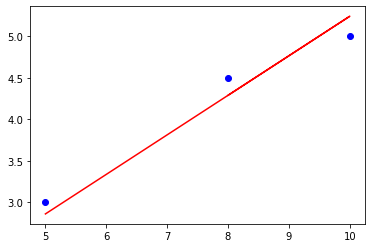

In [39]:
import outils

class Regression(object):
    
    def __init__(self, it_max=100, logistique=False, alpha=0.01, norm=True, const=True, var=True): 
        self.it_max = it_max
        self.alpha = alpha
        self.norm = norm
        self.const = const
        self.var = var
        
        if logistique :
            self.Hf=Prl
            self.Jf=BCE
            self.dJf=dBCE
        else:
            self.Hf=zf
            self.Jf=MSE
            self.dJf=dMSE   
    
    def entrainer(self, X, Y): 
        X_pre, self.mean, self.std = outils.preparer(X, norm=self.norm, const=self.const)
        Theta = outils.generer_aleatoire_1(X_pre.shape[1])
        self.Theta, self.couts, self.dernier_cout = descente(X_pre, Y, Theta, 
                                                             Hf=self.Hf, Jf=self.Jf, dJf=self.dJf, 
                                                             it_max=self.it_max, alpha=self.alpha, var=self.var)
        
    # La prédiction
    # si classes=False elle rend H sinon elle rend 0 ou 1 au cas de regression logistique
    def predire(self, X, classes=False, seuil=0.5):
        X_pre, self.mean, self.std = outils.preparer(X, norm=self.norm, const=self.const, mean=self.mean, std=self.std)
        H = self.Hf(X_pre, self.Theta)
        if classes and logistique:
            return H >= seuil
        return H

#=====================================================================
# TEST
#=====================================================================

reg_lin = Regression(norm=False)
X_t = np.array([[5.], [10.], [8.]])
Y_t = np.array([3., 5., 4.5])
reg_lin.entrainer(X_t, Y_t)

plt.scatter(X_t[:,0], Y_t, color="blue")
plt.plot(X_t[:,0], reg_lin.predire(X_t), color="red")
plt.show()

## II. Application et analyse

Cette partie sert à appliquer les algorithmes, modifier les paramètres et analyser les résultats


### II.1. Régression linéaire 

In [40]:
header = ["Superficie", "Prix"]
houses = pd.read_csv("datasets/houses.csv", names=header)
houses.head()

,Superficie,Prix
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [41]:
from sklearn.model_selection import train_test_split  

Xhouses = houses.iloc[:, :-1].values # Premières colonnes 
Yhouses = houses.iloc[:,-1].values # Dernière colonne 
Xhouses_train, Xhouses_test, Yhouses_train, Yhouses_test = train_test_split(Xhouses, Yhouses, test_size=0.2, random_state=0)  

len(Xhouses_train), len(Xhouses_test)

(37, 10)

#### II.1.1 Taux d'apprentissage et convergence 

Ici, nous avons varié le taux d'apprentissage et afficher les courbes de la fonction objective par rapport à l'itération. 

**TODO : Analyser les résultats**
- Que remarquez-vous ?

on remarque que l'augmentation de valeur de alpha permet d'atteindre le cout minimum plus rapidement  
- Donner une hypothèse

alpha controle la vitesse de convergence dans la descente de gradient

- Essayer de justifier cette hypothèse par ce que vous avez vu en cours

on peut justifier ca par la formule de mise a jour des theta $$\theta_i = \theta_i - \alpha \frac{\partial J}{\partial \theta_j}$$ qui indique qu'un plus grand alpha nous donne un plus grand pas dans la direction des gradients  

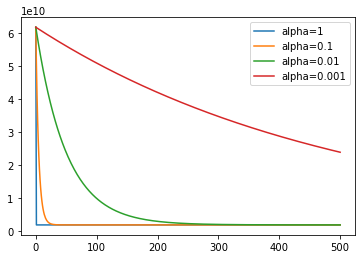

In [42]:
VAR = False
NORM = True
ITMAX = 500

reg_lin1 = Regression(it_max=ITMAX, norm=NORM, alpha=1., var=VAR)
reg_lin01 = Regression(it_max=ITMAX, norm=NORM, alpha=0.1, var=VAR)
reg_lin001 = Regression(it_max=ITMAX, norm=NORM, alpha=0.01, var=VAR)
reg_lin0001 = Regression(it_max=ITMAX, norm=NORM, alpha=0.001, var=VAR)

reg_lin1.entrainer(Xhouses_train, Yhouses_train)
reg_lin01.entrainer(Xhouses_train, Yhouses_train)
reg_lin001.entrainer(Xhouses_train, Yhouses_train)
reg_lin0001.entrainer(Xhouses_train, Yhouses_train)


plt.plot(reg_lin1.couts, label = "alpha=1")
plt.plot(reg_lin01.couts, label = "alpha=0.1")
plt.plot(reg_lin001.couts, label = "alpha=0.01")
plt.plot(reg_lin0001.couts, label = "alpha=0.001")
plt.legend()
#plt.autoscale()
plt.show()

#### II.1.2 Prediction 

**TODO : Analyser les résultats**
- Que remarquez-vous ?

Le modèle linéaire est incapable de capter les aspects non linéaire de nuage de données et donc ses prédictions sont loins des valeurs exacte de Y   

- Est-ce que régrèssion linéaire peut prédire exactement les valeurs Y ?  

Non le modéle de régression linéaire n'est pas aussi complexe pour capter la distribution de ce nuage de données et donc ne peut pas prédire exactement Y 



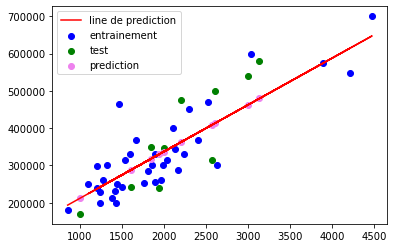

In [49]:
from sklearn.linear_model import LinearRegression  
regressor1 = LinearRegression(normalize=True)  
regressor1.fit(Xhouses_train, Yhouses_train) 

Yhouses_pred = regressor1.predict(Xhouses_test)  

plt.scatter(Xhouses_train, Yhouses_train, color="blue", label = "entrainement")
plt.scatter(Xhouses_test, Yhouses_test, color="green", label = "test")
plt.plot(Xhouses_train, regressor1.predict(Xhouses_train), color="red", label = "line de prediction")
plt.scatter(Xhouses_test, Yhouses_pred, color="violet", label = "prediction")
plt.legend()
plt.show()

#### II.1.3 Prediction avec régression multinomiale

Pour avoir des préductions sous formes des courbes non linéaires, nous avons générer des nouvelles caractéristiques : 
- $X^2$
- $X^5$
- $X^{10}$

**TODO : Analyser les résultats**
- Que remarquez-vous ?

On remarque que les modéles avec génération des nouvelles caractéristiques ont étaient capable de capter des aspetcs non linéaire dans le nuage de données

- Donner une hypothèse (en précisant si plus de données ou avoir des données complexes peut améliorer la performance)

Avoir des données complexes permet d'améliorer les performance  

- Essayer de justifier cette hypothèse par ce que vous avez vu en cours

Avoir des données complexes permet d'augmenter la capacité (l'éspace de fonction représentable par le modèle) de modéle ce qui permet aux modèle de capter des fonctions plus complexes et donc va améliorer ses performances  

[5821820983.85004, 6165717495.537205, 4717470457.648771, 15794233267.366587]


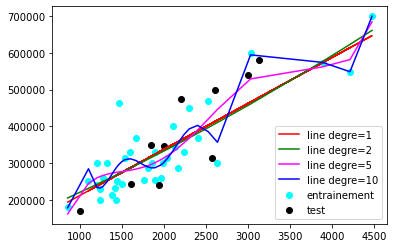

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

degres = [2, 5, 10]
erreurs = [mean_squared_error(Yhouses_test, Yhouses_pred)]
couleurs=["green", "magenta", "blue"]

# Trouver les indexes ordonnées 
idx = Xhouses_train[:,0].argsort()

plt.scatter(Xhouses_train[idx], Yhouses_train[idx], color="cyan", label = "entrainement")
plt.scatter(Xhouses_test, Yhouses_test, color="black", label = "test")
plt.plot(Xhouses_train, regressor1.predict(Xhouses_train), color="red", label = "line degre=1")

for i in range(len(degres)):
    poly = PolynomialFeatures(degree=degres[i], include_bias=False)
    Xhouse_train_poly = poly.fit_transform(Xhouses_train)
    regresseur = LinearRegression(normalize=True)  
    regresseur.fit(Xhouse_train_poly, Yhouses_train)  
    plt.plot(Xhouses_train[idx], regresseur.predict(Xhouse_train_poly)[idx], color=couleurs[i], label = "line degre=" + str(degres[i]))
    Xhouse_test_poly = poly.fit_transform(Xhouses_test)
    Yhouses_pred = regresseur.predict(Xhouse_test_poly) 
    erreurs.append(mean_squared_error(Yhouses_test, Yhouses_pred))

print(erreurs)
plt.legend()
plt.show()


### II.2. Régression logistique binaire 

In [51]:
notes = pd.read_csv("datasets/notes.csv")

# Extraction des features 
X_notes = notes.iloc[:, :-1].values # Premières colonnes 

Y_notes = notes.iloc[:,-1].values # Dernière colonne 

notes.head()

,Note1,Note2,Admis
0,9.75,16.00,1
1,2.25,9.50,0
2,4.50,2.50,0
3,15.50,10.25,1
4,3.25,19.50,1


#### II.2.1 Normalisation et convergence 

Ici, on veut tester l'effet de la normalisation sur la convergence du modèle.

**TODO : Analyser les résultats**
- Que remarquez-vous ?

La courbe Avec normalisation atteinds un plus petit couts en moins d'itération que sans normalisation

- Donner une hypothèse

la normalisation affecte la rapidité de convergence et aussi la qualité (elle permet d'obtenir des meilleurs minimum)

- Essayer de justifier cette hypothèse par ce que vous avez vu en cours

Travailler avec des données d’échelles variables peut constituer un problème de biais en ce sens qu’une variable numérique dont la plage de valeurs est comprise entre 0 et 10000 sera plus pesante(pluss grand theta) qu’une variable dont les valeurs sont comprises entre 0 et 1 . la normalisation permet de  redimensionner les variables numériques pour qu’elles soient comparables

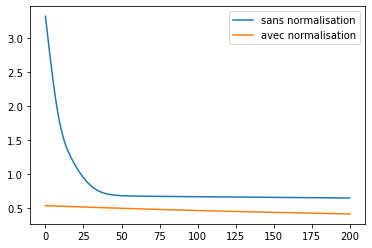

In [52]:
VAR = False
ALPHA = 0.01
ITMAX = 200

reg_log_nonorm = Regression(it_max=ITMAX, norm=False, alpha=ALPHA, var=VAR, logistique=True)
reg_log_nonorm.entrainer(X_notes, Y_notes)
reg_log_norm = Regression(it_max=ITMAX, norm=True, alpha=ALPHA, var=VAR, logistique=True)
reg_log_norm.entrainer(X_notes, Y_notes)

plt.plot(reg_log_nonorm.couts, label = "sans normalisation")
plt.plot(reg_log_norm.couts, label = "avec normalisation")

plt.legend()
#plt.autoscale()
plt.show()

#### II.2.2 Complexité du modèle et apprentissage

On veut améliorer la séparation entre les deux classes : "admis" et "non admis". Pour ce faire, on a proposé d'ajouter des caractéristiques complexes : $X^3$ et $X^5$.

**TODO : Analyser les résultats**

- Que remarquez-vous ? (les nouveaux modèles ont-il été capables d'améliorer le modèle initial ?)

On remarque que malgre que les nouveaux modèles sont plus compléxes ils sonts incapables d'améliorer les perforrmance de modèle initial

- Donner une hypothèse (Quelle est la raison ?)

en fait l'augmentation de complexité de modèle ne permet pas toujours d'augmenter ses performances mais peut parfois
diminnuer sa capacité de géneraliser(sur-aprentissage)


- Essayer de justifier cette hypothèse par ce que vous avez vu en cours

l'augmentation de complexité de modèle peut mèner au problème de sur-apprentissage ou le modèle va mémoriser les données d'entrainement parceque sa capacité est plus grand que la compléxité de problème tacklé 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


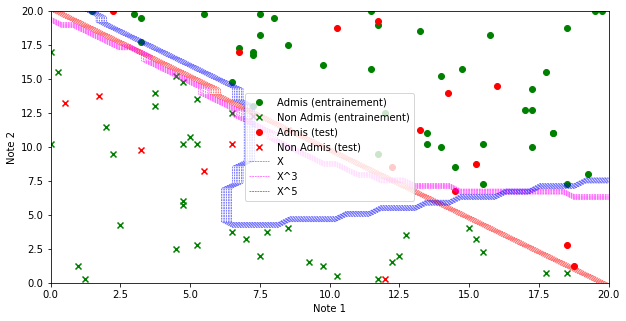

In [53]:
from outils import courbe_decision
from sklearn.linear_model import LogisticRegression

degres = [3, 5]
couleurs=["red", "magenta", "blue"]

def dessiner2D(modele, ax, xrange, yrange, poly=None, colors=["red"], label=""):
    XX = [[[xr, yr] for xr in xrange] for yr in yrange]
    XX = np.array(XX).reshape(-1, 2)
    #grid = [[modele.predict(np.array([[xr, yr]])) for xr in xrange] for yr in yrange]
    #grid = np.array(grid).reshape(len(xrange), len(yrange))
    if poly:
        XX = poly.fit_transform(XX)
    grid = modele.predict(XX).reshape(len(xrange), len(yrange))
    cs = ax.contour(xrange, yrange, grid, colors=colors,linewidths=(0.5),linestyles=('--'),levels=None)
    cs.collections[1].set_label(label)


X_notes_train = X_notes[:80,:]
X_notes_test = X_notes[80:,:]
Y_notes_train = Y_notes[:80]
Y_notes_test = Y_notes[80:]
# Trouver les indexes ordonnées 
idx2 = X_notes_train[:,0].argsort()

oui_train = Y_notes_train == 1
oui_test = Y_notes_test == 1

fig, ax = plt.subplots(figsize=(10, 5))
#ax.scatter(X_notes_train[:,0], X_notes_train[:,1], c=Y_notes_train, lw=0, alpha=1.)
#ax.scatter(X_notes_test[:,0], X_notes_test[:,1], c=Y_notes_test, marker="x", lw=0, alpha=1.)
ax.scatter(X_notes_train[oui_train, 0], X_notes_train[oui_train, 1], color="green", marker="o", label="Admis (entrainement)")
ax.scatter(X_notes_train[~oui_train, 0], X_notes_train[~oui_train, 1], color="green", marker="x", label="Non Admis (entrainement)")

ax.scatter(X_notes_test[oui_test, 0], X_notes_test[oui_test, 1], color="red", marker="o", label="Admis (test)")
ax.scatter(X_notes_test[~oui_test, 0], X_notes_test[~oui_test, 1], color="red", marker="x", label="Non Admis (test)")

reglog1 = LogisticRegression(penalty='none')
reglog1.fit(X_notes_train, Y_notes_train)

xrange = np.linspace(0, 20, 50)
yrange = np.linspace(0, 20, 50)
dessiner2D(reglog1, ax, xrange, yrange, label="X")

for i in range(len(degres)):
    poly = PolynomialFeatures(degree=degres[i], include_bias=False)
    X_notes_train_poly = poly.fit_transform(X_notes_train)
    reglogi = LogisticRegression(penalty='none')
    reglogi.fit(X_notes_train_poly, Y_notes_train)
    dessiner2D(reglogi, ax, xrange, yrange, poly=poly, colors=[couleurs[i+1]], label="X^" + str(degres[i]))



plt.xlabel("Note 1")
plt.ylabel("Note 2")
plt.legend()
plt.show()


In [54]:
print("Good luck")

Good luck
